---

**APRP: 2. Introduction to Probabilistic Graphical Models**

---


**Contents**
--------
1. What is A Probabilistic Graphical Model
2. Modelling Conditional Probabilities as Graphs
3. Bayesian Networks
4. Using pgmpy package


### 1. Setting up the enviroment
Loading common Libraries.

We are also import the pgmpy package (https://pgmpy.org/) for Bayesian Networks. It implemnts alogrithms for Structure Learning, Parameter Estimation, Approximate and Exact inference, and Causal Inference.


In [1]:
!pip install pgmpy #<-- IF not installed already
!pip install networkx[default]
!pip install --upgrade networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [3]:
import pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.utils import get_example_model


### 2. Testing a Bayesian Network

Proababilistic Graphical Models (PGM): PGM is a technique of compactly representing Joint Probability Distribution over random variables by exploiting the (conditional) independencies between the variables. PGM also provides us methods for efficiently doing inference over these joint distributions.

Each graphical model is characterized by a graph structure (can be directed, undirected or both) and a set of parameters associated with each graph.


Create the Alarm Bayesian Network using pgmpy and do some simple queries on the network. This network is mentioned in Bayesian Artificial Intelligence - Section 2.5.1 (https://bayesian-intelligence.com/publications/bai/book/BAI_Chapter2.pdf)






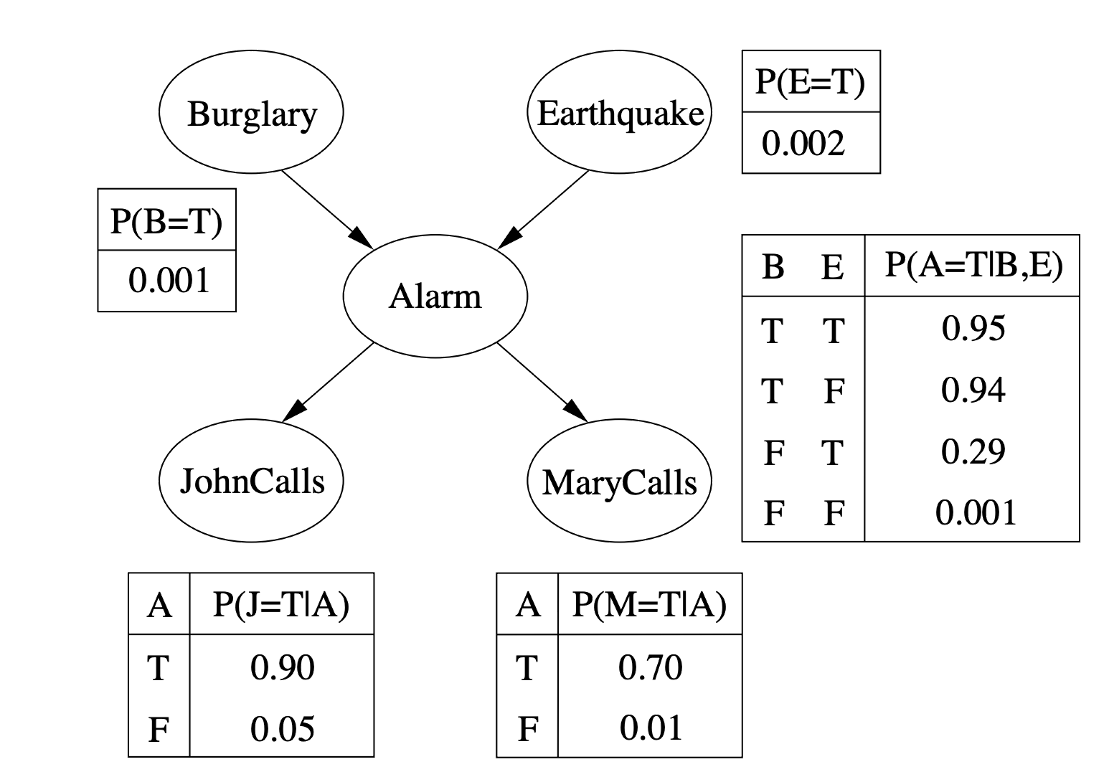

In [4]:
Image(filename='alarm.png')

In [5]:
# Defining network structure

alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

# Defining the parameters using CPT
from pgmpy.factors.discrete import TabularCPD

cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)
cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)
cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)
cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    # values=[[0.3, 0.99], [0.7, 0.01]],
    values=[[0.99, 0.3], [0.01, 0.7]],
    evidence=["Alarm"],
    evidence_card=[2],
)

# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

In [6]:
# Checking if the cpds are valid for the model
alarm_model.check_model()
# Viewing nodes of the model
alarm_model.nodes()
# Viewing edges of the model
alarm_model.edges()
# Checking independcies of a node
alarm_model.local_independencies("Earthquake")
#alarm_model.get_independencies()

(Earthquake ⟂ Burglary)

In [7]:
#import networkx as nx

#import pylab as plt
#nx.draw(alarm_model, with_labels=True)
#plt.show()

### 3. Writting the Bayes Net to a BIF file
Loading common Libraries.

In [8]:
from pgmpy.readwrite import BIFWriter
from pgmpy.readwrite import BIFReader
writer = BIFWriter(alarm_model)
writer.write_bif(filename='alarm_model2.bif')

alarm_model2 = BIFReader("alarm_model2.bif").get_model()

### 4. Drawing conclusion from the data


In [9]:
#Return the probability of the given set of states.
#The probability that the alarm has sounded but neither a burglary nor an earthquake has occurred, and both John and Mary calls
q = alarm_model.get_state_probability({"Burglary": 0,"Earthquake":0,"JohnCalls":1,"MaryCalls":1,"Alarm":1})
print(q)

0.0006281112599999999


In [10]:
# Computing the probability that John calls?
infer = VariableElimination(alarm_model)
q = infer.query(variables=["JohnCalls"])
print(q)

# Computing the probability that there is a burglary given that John and Mary calls?
q = infer.query(variables=["Burglary"], evidence={"JohnCalls": 1,"MaryCalls":1})
#print(q)


# Computing the joint probability given Alarm=1
q = infer.query(variables=["JohnCalls", "MaryCalls","Burglary","Earthquake"], evidence={"Alarm": 1})
#print(q)

# Computing the probabilities (not joint)  given Alarm=1
q = infer.query(variables=["JohnCalls", "MaryCalls"], evidence={"Alarm": 1}, joint=False)
#for factor in q.values():
#    print(factor)

+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.9479 |
+--------------+------------------+
| JohnCalls(1) |           0.0521 |
+--------------+------------------+


Try to answer this questions: %TODO%
- What is the probability of Mary calling given that John called?
- What is the probability of a Burglary given that John and Mary called?
- Propose 2 more relevant questions.

In [11]:
# Computing the probability of Mary calling given that John called?

q = infer.query(variables=["MaryCalls"], evidence={"JohnCalls": 1})
print(q)

+--------------+------------------+
| MaryCalls    |   phi(MaryCalls) |
+==============+==================+
| MaryCalls(0) |           0.9600 |
+--------------+------------------+
| MaryCalls(1) |           0.0400 |
+--------------+------------------+


In [12]:
# Computing the probability of a Burglary given that John and Mary called?

q = infer.query(variables=["Burglary"], evidence={"JohnCalls": 1,"MaryCalls":1})
print(q)

+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.7158 |
+-------------+-----------------+
| Burglary(1) |          0.2842 |
+-------------+-----------------+


### 5. Test the asia.bif dataset %TODO%
Prepare a Jupyter NoteBook report for the analysis of the asia.bif dataset. Include:
- Analysis and intepretation of the dataset.
- Prepare a graphical representation of the dependencies
- Analyse the indedependencies
- Draw relevant conclusion from the data. Ilustrate with examples.

# **1 - Analyis and interpretation of the dataset**

Neste dataset temos uma rede bayesiana com 7 nodes, sendo estes:


1.   asia - Se o paciente esteve, ou não, na Asia;

1.   tub - Se o paciente tem, ou não, tuberculose;

1.   smoke - Se o paciente fuma ou não fuma;

1.   lung - Se o paciente tem, ou não, cancro no pulmão;

1.   bronc - Se o paciente tem, ou não, bronquite;
2.   either - Se o paciente tem, ou não, cancro no pulmão e bronquite;

2.   xray - Se o paciente tem, ou não, um raio-x positivo;

2.   dysp - Se o paciente tem, ou não, dispneia;

Todos este nodes têm os seus valores de probabilidade.

# **2 - Prepare a graphical representation of the dependencies**

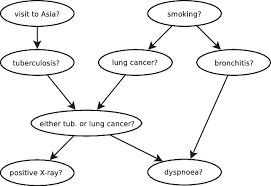

In [13]:
Image(filename='asia.png')

In [14]:
# Defining network structure

asian_model = BayesianNetwork(
    [
        ("asia", "tub"),
        ("smoke", "lung"),
        ("tub", "either"),
        ("lung", "either"),
        ("smoke", "bronc"),
        ("either", "dysp"),
        ("either", "xray"),
        ("bronc", "dysp"),
    ]
)


# Defining the parameters using CPT
from pgmpy.factors.discrete import TabularCPD

cpd_asia = TabularCPD(
    variable="asia",
    variable_card=2,
    values=[[0.99], [0.01]]
)
cpd_tub = TabularCPD(
    variable="tub",
    variable_card=2,
    values=[[0.99, 0.95], [0.01, 0.05]],
    evidence=["asia"],
    evidence_card=[2],
)
cpd_smoke = TabularCPD(
    variable="smoke",
    variable_card=2,
    values=[[0.5], [0.5]]
)
cpd_lung = TabularCPD(
    variable="lung",
    variable_card=2,
    values=[[0.99, 0.9], [0.01, 0.1]],
    evidence=["smoke"],
    evidence_card=[2],
)
cpd_bronc = TabularCPD(
    variable="bronc",
    variable_card=2,
    values=[[0.7, 0.4], [0.3, 0.6]],
    evidence=["smoke"],
    evidence_card=[2],
)
cpd_either = TabularCPD(
    variable="either",
    variable_card=2,
    values=[[1.0, 0.0, 0.0, 0.0],[0.0, 1.0, 1.0, 1.0]],
    evidence=["tub", "lung"],
    evidence_card=[2, 2],
)
cpd_xray = TabularCPD(
    variable="xray",
    variable_card=2,
    values=[[0.95, 0.02],[0.05, 0.98]],
    evidence=["either"],
    evidence_card=[2],
)
cpd_dysp = TabularCPD(
    variable="dysp",
    variable_card=2,
    values=[[0.9, 0.3, 0.2, 0.1],[0.1, 0.7, 0.8, 0.9]],
    evidence=["either", "bronc"],
    evidence_card=[2, 2],
)

# Associating the parameters with the model structure
asian_model.add_cpds(
    cpd_asia, cpd_tub, cpd_smoke, cpd_lung, cpd_either, cpd_bronc, cpd_xray, cpd_dysp
)

# **3 - Analyse the indedependencies**

In [15]:
# Checking if the cpds are valid for the model
asian_model.check_model()
# Viewing nodes of the model
asian_model.nodes()
# Viewing edges of the model
asian_model.edges()
# Checking independcies of a node
print(asian_model.local_independencies("asia"))
print(asian_model.local_independencies("tub"))
print(asian_model.local_independencies("smoke"))
print(asian_model.local_independencies("lung"))
print(asian_model.local_independencies("either"))
print(asian_model.local_independencies("bronc"))
print(asian_model.local_independencies("xray"))
print(asian_model.local_independencies("dysp"))
#asian_model.get_independencies()

(asia ⟂ lung, smoke, bronc)
(tub ⟂ lung, smoke, bronc | asia)
(either ⟂ asia, smoke, bronc | lung, tub)
(xray ⟂ asia, lung, smoke, bronc, dysp, tub | either)
(smoke ⟂ asia, tub)
(lung ⟂ asia, tub, bronc | smoke)
(bronc ⟂ asia, either, xray, lung, tub | smoke)
(dysp ⟂ asia, xray, lung, smoke, tub | either, bronc)


* Asia está diretamente ligada a Tub e é independente de Lung, Smoke e Bronc

*   Tub está diretamente ligada a Asia e Either e é independente de Lung, Smoke e Bronc

*   Smoke está diretamente ligada a Lung e Bronc e é independente de Asia e Tub
*   Lung está diretamente ligada a Smoke e Either e é independente de Asia, Tub e Bronc


*   Either está diretamente ligada a Tub, Lung, Xray e Dysp e é independente de Asia, Smoke e Bronc


*   Bronc está diretamente ligada a Smoke e Dysp e é independente de Asia, Tub, Lung, Either e Xray


*   Xray está diretamente ligada a Either e é independente de Asia, Lung, Smoke, Tub, Dysp e Bronc
*   Dysp está diretamente ligada a Either e Bronc e é independente de Asia, Lung, Smoke, Tub e Xray


In [16]:
from pgmpy.readwrite import BIFWriter
from pgmpy.readwrite import BIFReader
writer = BIFWriter(asian_model)
writer.write_bif(filename='asian_model2.bif')

asian_model2 = BIFReader("asian_model2.bif").get_model()

#**4 - Draw relevant conclusion from the data. Ilustrate with examples.**

In [17]:
infer = VariableElimination(asian_model)
# Computing the probability that the patient has bronchitis?
q = infer.query(variables=["bronc"])
print(q)

# Computing the probability that the patient has dyspnea given that he visited Asia and suffers from lung cancer?
q = infer.query(variables=["dysp"], evidence={"asia": 1,"lung":1})
print(q)

# Computing the probability that the patient visited Asia given that he smokes and has lung cancer?
q = infer.query(variables=["asia"], evidence={"smoke": 1,"lung":1})
print(q)

# Computing the probability that the patient has lung cancer given that he has dyspnea and visited Asia?
q = infer.query(variables=["lung"], evidence={"dysp": 1,"asia":1})
print(q)

# Computing the joint probability given either=1
q = infer.query(variables=["dysp", "xray"], evidence={"either": 1})
print(q)

# Computing the probabilities (not joint) given either=1
q = infer.query(variables=["dysp", "xray"], evidence={"either": 1}, joint=False)
for factor in q.values():
    print(factor)

+----------+--------------+
| bronc    |   phi(bronc) |
+==========+==============+
| bronc(0) |       0.5500 |
+----------+--------------+
| bronc(1) |       0.4500 |
+----------+--------------+
+---------+-------------+
| dysp    |   phi(dysp) |
+=========+=============+
| dysp(0) |      0.1427 |
+---------+-------------+
| dysp(1) |      0.8573 |
+---------+-------------+
+---------+-------------+
| asia    |   phi(asia) |
+=========+=============+
| asia(0) |      0.9900 |
+---------+-------------+
| asia(1) |      0.0100 |
+---------+-------------+
+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.8865 |
+---------+-------------+
| lung(1) |      0.1135 |
+---------+-------------+
+---------+---------+------------------+
| dysp    | xray    |   phi(dysp,xray) |
+=========+=========+==================+
| dysp(0) | xray(0) |           0.0029 |
+---------+---------+------------------+
| dysp(0) | xray(1) |           0.1418 |
+---------+-